In [1]:
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from plot import plot_loss_and_acc
from models import ConvNet, ConvNetDropout, MLP
from utils import train_one_epoch, test

In [2]:
n_epochs = 10
batch_size = 100
learning_rate = 0.001
weight_decay = 0.0001
momentum = 0.5
disp_freq = 100
all_loss, all_acc = [], []

## Load data

In [3]:
root = 'data'

# convert to tensor and normalize
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (1.0,))])

# download data
train_data = datasets.MNIST(root=root, train=True, download=True, transform=transform)
test_data = datasets.MNIST(root=root, train=False, download=True, transform=transform)

# create dataloader
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=len(test_data), shuffle=False)

## ConvNet without dropout

In [4]:
model = ConvNet()
optimizer = optim.Adam(model.parameters(),
                      lr=learning_rate,
                      weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

train_loss, train_acc = [], []

for epoch in range(n_epochs):
    epoch_loss, epoch_acc = train_one_epoch(epoch, n_epochs, train_loader, test_loader, model, optimizer, criterion, disp_freq, device)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc) 
    test_acc = test(test_loader, model, criterion, device)
    print("Test accuracy {:.4f}".format(test_acc))

all_loss.append(train_loss)
all_acc.append(train_acc)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [1][10]	 Batch [100][600]	 Training Loss 2.3126	 Accuracy 0.1010
Epoch [1][10]	 Batch [200][600]	 Training Loss 2.3066	 Accuracy 0.1594
Epoch [1][10]	 Batch [300][600]	 Training Loss 2.1409	 Accuracy 0.3524
Epoch [1][10]	 Batch [400][600]	 Training Loss 1.8138	 Accuracy 0.4691
Epoch [1][10]	 Batch [500][600]	 Training Loss 1.5710	 Accuracy 0.5464
Epoch [1][10]	 Batch [600][600]	 Training Loss 1.3893	 Accuracy 0.6018
Test accuracy 0.8792
Epoch [2][10]	 Batch [100][600]	 Training Loss 0.4115	 Accuracy 0.8924
Epoch [2][10]	 Batch [200][600]	 Training Loss 0.3942	 Accuracy 0.8998
Epoch [2][10]	 Batch [300][600]	 Training Loss 0.3725	 Accuracy 0.9056
Epoch [2][10]	 Batch [400][600]	 Training Loss 0.3546	 Accuracy 0.9098
Epoch [2][10]	 Batch [500][600]	 Training Loss 0.3395	 Accuracy 0.9137
Epoch [2][10]	 Batch [600][600]	 Training Loss 0.3264	 Accuracy 0.9173
Test accuracy 0.9354
Epoch [3][10]	 Batch [100][600]	 Training Loss 0.2418	 Accuracy 0.9380
Epoch [3][10]	 Batch [200][600]	 Tr

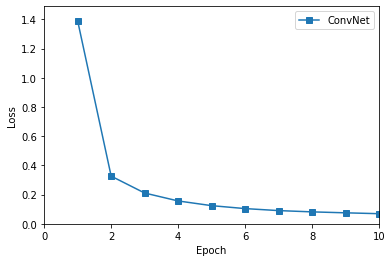

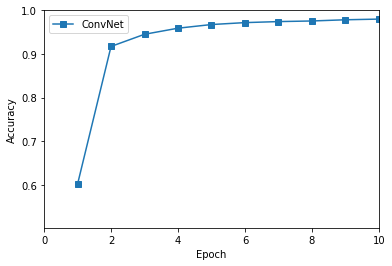

In [5]:
plot_loss_and_acc({'ConvNet': [train_loss, train_acc]})

## ConvNet with dropout

In [6]:
model = ConvNetDropout()
optimizer = optim.Adam(model.parameters(),
                      lr=learning_rate,
                      weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

train_loss, train_acc = [], []

for epoch in range(n_epochs):
    epoch_loss, epoch_acc = train_one_epoch(epoch, n_epochs, train_loader, test_loader, model, optimizer, criterion, disp_freq, device)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc) 
    test_acc = test(test_loader, model, criterion, device)
    print("Test accuracy {:.4f}".format(test_acc))

all_loss.append(train_loss)
all_acc.append(train_acc)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [1][10]	 Batch [100][600]	 Training Loss 2.3166	 Accuracy 0.0987
Epoch [1][10]	 Batch [200][600]	 Training Loss 2.3071	 Accuracy 0.1134
Epoch [1][10]	 Batch [300][600]	 Training Loss 2.1924	 Accuracy 0.3116
Epoch [1][10]	 Batch [400][600]	 Training Loss 1.8859	 Accuracy 0.4406
Epoch [1][10]	 Batch [500][600]	 Training Loss 1.6335	 Accuracy 0.5256
Epoch [1][10]	 Batch [600][600]	 Training Loss 1.4413	 Accuracy 0.5857
Test accuracy 0.8844
Epoch [2][10]	 Batch [100][600]	 Training Loss 0.4119	 Accuracy 0.9028
Epoch [2][10]	 Batch [200][600]	 Training Loss 0.3863	 Accuracy 0.9082
Epoch [2][10]	 Batch [300][600]	 Training Loss 0.3700	 Accuracy 0.9112
Epoch [2][10]	 Batch [400][600]	 Training Loss 0.3534	 Accuracy 0.9140
Epoch [2][10]	 Batch [500][600]	 Training Loss 0.3388	 Accuracy 0.9174
Epoch [2][10]	 Batch [600][600]	 Training Loss 0.3246	 Accuracy 0.9196
Test accuracy 0.9301
Epoch [3][10]	 Batch [100][600]	 Training Loss 0.2468	 Accuracy 0.9338
Epoch [3][10]	 Batch [200][600]	 Tr

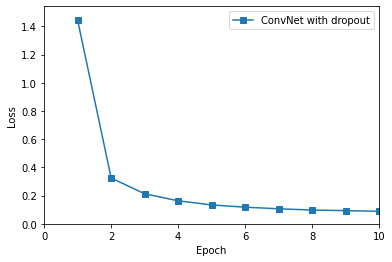

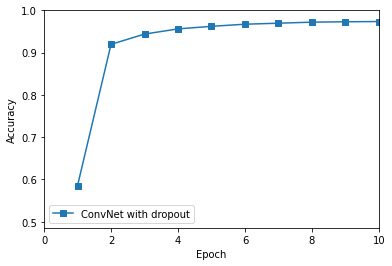

In [7]:
plot_loss_and_acc({'ConvNet with dropout': [train_loss, train_acc]})

## MLP

In [8]:
model = MLP()
optimizer = optim.Adam(model.parameters(),
                      lr=learning_rate,
                      weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

train_loss, train_acc = [], []

for epoch in range(n_epochs):
    epoch_loss, epoch_acc = train_one_epoch(epoch, n_epochs, train_loader, test_loader, model, optimizer, criterion, disp_freq, device)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc) 
    test_acc = test(test_loader, model, criterion, device)
    print("Test accuracy {:.4f}".format(test_acc))

all_loss.append(train_loss)
all_acc.append(train_acc)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [1][10]	 Batch [100][600]	 Training Loss 1.5485	 Accuracy 0.8241
Epoch [1][10]	 Batch [200][600]	 Training Loss 1.1306	 Accuracy 0.8510
Epoch [1][10]	 Batch [300][600]	 Training Loss 0.9209	 Accuracy 0.8663
Epoch [1][10]	 Batch [400][600]	 Training Loss 0.7941	 Accuracy 0.8756
Epoch [1][10]	 Batch [500][600]	 Training Loss 0.7086	 Accuracy 0.8819
Epoch [1][10]	 Batch [600][600]	 Training Loss 0.6465	 Accuracy 0.8879
Test accuracy 0.9176
Epoch [2][10]	 Batch [100][600]	 Training Loss 0.3179	 Accuracy 0.9177
Epoch [2][10]	 Batch [200][600]	 Training Loss 0.3126	 Accuracy 0.9189
Epoch [2][10]	 Batch [300][600]	 Training Loss 0.3075	 Accuracy 0.9201
Epoch [2][10]	 Batch [400][600]	 Training Loss 0.3002	 Accuracy 0.9218
Epoch [2][10]	 Batch [500][600]	 Training Loss 0.2939	 Accuracy 0.9226
Epoch [2][10]	 Batch [600][600]	 Training Loss 0.2877	 Accuracy 0.9237
Test accuracy 0.9293
Epoch [3][10]	 Batch [100][600]	 Training Loss 0.2498	 Accuracy 0.9330
Epoch [3][10]	 Batch [200][600]	 Tr

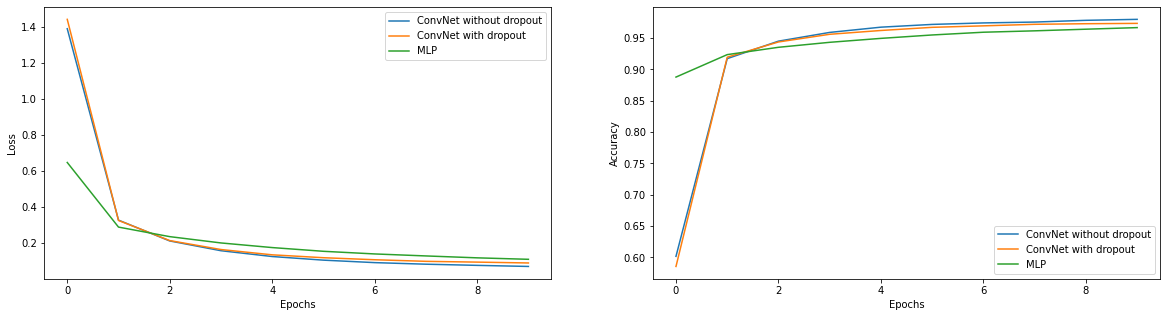

In [9]:
import matplotlib.pyplot as plt

# loss
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
for x in all_loss:
    plt.plot(x)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['ConvNet without dropout', 'ConvNet with dropout', 'MLP'])

# accuracy
plt.subplot(1, 2, 2)
for x in all_acc:
    plt.plot(x)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['ConvNet without dropout', 'ConvNet with dropout', 'MLP'])
plt.show()